In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy.io import loadmat
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


## Following section of the code is for pre-processing the data before using in the model. Note that the SEED-IV data used here is kept in the same folder structure as provided from source (no actual data is referenced here)

In [ ]:
# The are the labels for each of the 24 videos shown to participants in the 3 trials.
# The labels 0, 1, 2, and 3 denote neutral, sad, fear, and happy emotions
labels_exp_1=['1','2','3','0','2','0','0','1','0','1','2','1','1','1','2','3','2','2','3','3','0','3','0','3']
labels_exp_2=['2','1','3','0','0','2','0','2','3','3','2','3','2','0','1','1','2','1','0','3','0','1','3','1']
labels_exp_3=['1','2','2','1','3','3','3','1','1','2','1','0','2','3','3','0','2','3','0','0','2','0','1','0']

In [ ]:
# Here we are extracting 3 frequency channels for 6 electrodes for DE data
file_label=[]
dir_paths =['/content/drive/My Drive/SEED-IV/eeg_feature_smooth/1/','/content/drive/My Drive/SEED-IV/eeg_feature_smooth/2/','/content/drive/My Drive/SEED-IV/eeg_feature_smooth/3/']
d=1
for directory in dir_paths:
    files = [f for f in listdir(directory) if isfile(join(directory, f))]
    f=1
    for file in files:
        df = loadmat(directory+file)
        columns=list(df.keys())
        '''
        The column list generated above should look like this:
        dict_keys(['__header__', '__version__', '__globals__', 'de_movingAve1', 'de_LDS1', 'psd_movingAve1', 'psd_LDS1', 'de_movingAve2', 'de_LDS2', 'psd_movingAve2', 'psd_LDS2', 'de_movingAve3', 'de_LDS3', 'psd_movingAve3', 'psd_LDS3', 'de_movingAve4', 'de_LDS4', 'psd_movingAve4', 'psd_LDS4', 'de_movingAve5', 'de_LDS5', 'psd_movingAve5', 'psd_LDS5', 'de_movingAve6', 'de_LDS6', 'psd_movingAve6', 'psd_LDS6', 'de_movingAve7', 'de_LDS7', 'psd_movingAve7', 'psd_LDS7', 'de_movingAve8', 'de_LDS8', 'psd_movingAve8', 'psd_LDS8', 'de_movingAve9', 'de_LDS9', 'psd_movingAve9', 'psd_LDS9', 'de_movingAve10', 'de_LDS10', 'psd_movingAve10', 'psd_LDS10', 'de_movingAve11', 'de_LDS11', 'psd_movingAve11', 'psd_LDS11', 'de_movingAve12', 'de_LDS12', 'psd_movingAve12', 'psd_LDS12', 'de_movingAve13', 'de_LDS13', 'psd_movingAve13', 'psd_LDS13', 'de_movingAve14', 'de_LDS14', 'psd_movingAve14', 'psd_LDS14', 'de_movingAve15', 'de_LDS15', 'psd_movingAve15', 'psd_LDS15', 'de_movingAve16', 'de_LDS16', 'psd_movingAve16', 'psd_LDS16', 'de_movingAve17', 'de_LDS17', 'psd_movingAve17', 'psd_LDS17', 'de_movingAve18', 'de_LDS18', 'psd_movingAve18', 'psd_LDS18', 'de_movingAve19', 'de_LDS19', 'psd_movingAve19', 'psd_LDS19', 'de_movingAve20', 'de_LDS20', 'psd_movingAve20', 'psd_LDS20', 'de_movingAve21', 'de_LDS21', 'psd_movingAve21', 'psd_LDS21', 'de_movingAve22', 'de_LDS22', 'psd_movingAve22', 'psd_LDS22', 'de_movingAve23', 'de_LDS23', 'psd_movingAve23', 'psd_LDS23', 'de_movingAve24', 'de_LDS24', 'psd_movingAve24', 'psd_LDS24'])
        We want to pick all the columns that begin with de_movingAve (de_movingAve1....de_movingAve24)
        '''
        i=3
        subset=[]
        while i<99:
            subset.append(columns[i])
            i=i+4
        j=1
        for col in subset:
            #print(df[col].shape)
            channel=[14,22,23,31,32,40] # Corresponds to channels FT7,T7,TP7,FT8,T8,P8
            freq_bands=[2,3,4] # freq bands alpha, beta and gamma
            fr=1
            for freq in freq_bands: # out of the 5 freq bands alpha, beta and gamma contain the most discriminative information
                for chn in channel: # These channels contains the most information for emotion analysis
                    
                    a1= df[col][chn,:,freq]
                    padded_array1 = np.zeros((64, ))
                    shape1 = np.shape(a1)
                    padded_array1[:shape1[0],] = a1
                                       
                 
                    if chn==14:
                        f_channel = padded_array1
                        
                    else:
                        f_channel =np.vstack((f_channel,padded_array1))
                        #print(f_channel)
                        
                if fr==1:
                    freq_f_channel=f_channel
                    #print(freq_f_channel.shape)
                else:
                    freq_f_channel=np.vstack((freq_f_channel,f_channel))
                fr=fr+1
            freq_f_channel.reshape(6,64,3)
            #print(freq_f_channel)
            if j==1:
                trial_data=freq_f_channel
            else:
                trial_data=np.vstack((trial_data,freq_f_channel))
                #print(trial_data.shape)
            j=j+1
            # We want to add the labels once we are done reading all the trial data (24) for the subject for experiment conducted on one of the day
            if directory=='/content/drive/My Drive/SEED-IV/eeg_feature_smooth/1/' and j==25:
                file_label.append(labels_exp_1)
                #print(file_label)
            elif directory=='/content/drive/My Drive/SEED-IV/eeg_feature_smooth/2/' and j==25:
                file_label.append(labels_exp_2)
            elif directory=='/content/drive/My Drive/SEED-IV/eeg_feature_smooth/3/' and j==25:
                file_label.append(labels_exp_3)
        if f==1:
            file_data=trial_data
        else:
            file_data=np.vstack((file_data,trial_data))
            #print(file_data.shape)
        f=f+1
    if d==1:
        dir_data=file_data
    else:
        dir_data=np.vstack((dir_data,file_data))
        #print(dir_data.shape)
    d=d+1

flat_list = [item for sublist in file_label for item in sublist]

In [ ]:
dir_data.shape

(19440, 64)

In [ ]:
# Here 1080 are the total data points (15 subject x 24 trials x 3 different days when the trails were conducted=1080)
# 3 are the frequency bands we have chosen to use
# 6 for the channels that we have selected that have been found in research for having the highest impact on emotions
model_data=dir_data.reshape(1080,3,6,64)

In [ ]:
len(flat_list)

1080

In [ ]:
np.array(flat_list).shape

(1080,)

In [ ]:
# converting the labels that show up as float values in array to integer
for i in range(0, len(flat_list)): 
    flat_list[i] = int(flat_list[i]) 

In [ ]:
# https://github.com/Song-zhenzhen/EEG_emotion_classification_use_CNN-and-RNN/blob/master/CNN%2BRNN.py
import numpy as np
from keras.utils import to_categorical
from keras.layers import Conv1D, GRU, GlobalAveragePooling1D, Activation, Flatten, Dropout, Dense, MaxPool1D
from keras.models import Sequential
import scipy.io
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, train_test_split

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

df_all = min_max_scaler.fit_transform(dir_data)

df_all = df_all.reshape(1080,3,6,64)

index=np.ones(1080)
for i in range(1080):
    index[i]=i
np.random.shuffle(index)
index=index.astype('int64')
index_train=index[0:810]
index_test=index[810:]
x_total = df_all[index_train]
y_total = np.array(flat_list)[index_train]
x_test = df_all[index_test]
y_test = np.array(flat_list)[index_test]
x_train, x_valid, y_train, y_valid = train_test_split(x_total, y_total, test_size = 0.2, random_state = 1)


In [ ]:
x_train.shape

(648, 3, 6, 64)

In [ ]:
# convert to categorical labels
y_train = to_categorical(y_train, num_classes = 4)
y_test = to_categorical(y_test, num_classes = 4)
y_valid = to_categorical(y_valid, num_classes = 4)

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend, models, layers, regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Model 1: Single Modality, using DE data from 6-channels (FT7, T7, TP7, FT8, T8, P8) and 3-frequency bands (α, β and γ)

In [ ]:
# Building our first Sequential model which will make use of the reshaped EEG data for classification
backend.clear_session()
model = models.Sequential()
model.add(layers.Conv2D(32, (2,2), activation = 'relu', input_shape = (3,6, 64)))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, 
          y_train, 
          epochs = 20, 
          batch_size = 32,  
          validation_data=(x_valid, y_valid),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

Epoch 1/20
21/21 [==============================] - 0s 5ms/step - loss: 0.7346 - accuracy: 0.6512 - val_loss: 0.8749 - val_accuracy: 0.6235
Epoch 2/20
21/21 [==============================] - 0s 5ms/step - loss: 0.6860 - accuracy: 0.7006 - val_loss: 0.7976 - val_accuracy: 0.6975
Epoch 3/20
21/21 [==============================] - 0s 5ms/step - loss: 0.6969 - accuracy: 0.6836 - val_loss: 0.8486 - val_accuracy: 0.6728
Epoch 4/20
21/21 [==============================] - 0s 5ms/step - loss: 0.6673 - accuracy: 0.6960 - val_loss: 0.7129 - val_accuracy: 0.7037
Epoch 5/20
21/21 [==============================] - 0s 5ms/step - loss: 0.6471 - accuracy: 0.7176 - val_loss: 0.7203 - val_accuracy: 0.6852
Epoch 6/20
21/21 [==============================] - 0s 6ms/step - loss: 0.6656 - accuracy: 0.6944 - val_loss: 0.6924 - val_accuracy: 0.7160
Epoch 7/20
21/21 [==============================] - 0s 5ms/step - loss: 0.6648 - accuracy: 0.6991 - val_loss: 0.7622 - val_accuracy: 0.6852
Epoch 8/20
21/21 [==

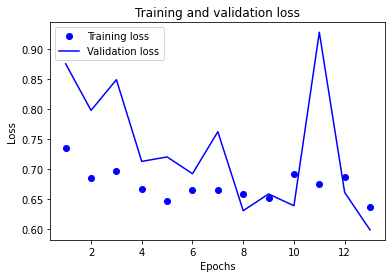

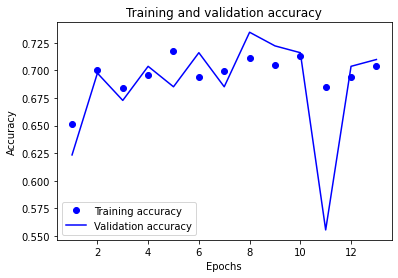

9/9 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6889
test_acc: 0.6888889074325562


In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

In [ ]:
# load eye data in the model
file_label=[]
dir_paths =['/content/drive/My Drive/SEED-IV/eye_feature_smooth/1/','/content/drive/My Drive/SEED-IV/eye_feature_smooth/2/','/content/drive/My Drive/SEED-IV/eye_feature_smooth/3/']
d=1
for directory in dir_paths:
    files = [f for f in listdir(directory) if isfile(join(directory, f))]

    for file in files:
        df = loadmat(directory+file)

        eye_columns=list(df.keys())[3:]

        for col in eye_columns:

          a1= df[col]
          padded_array1 = np.zeros((31,64))
          shape1 = np.shape(a1)
          padded_array1[:shape1[0],:shape1[1]] = a1

          if d==1:
            file_eye_data = padded_array1
          else:
            #print(padded_array1.shape)
            file_eye_data =np.vstack((file_eye_data,padded_array1))
          d=d+1

In [ ]:
file_eye_data.shape

(33480, 64)

In [ ]:
import numpy as np
from keras.utils import to_categorical
from keras.layers import Conv1D, GRU, GlobalAveragePooling1D, Activation, Flatten, Dropout, Dense, MaxPool1D
from keras.models import Sequential
import scipy.io
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, train_test_split
min_max_scaler = preprocessing.MinMaxScaler()
#ValueError: Found array with dim 3. MinMaxScaler expected <= 2.
df_all = min_max_scaler.fit_transform(file_eye_data)
eye_data=df_all.reshape(1080,31,64)

In [ ]:
index=np.ones(1080)
for i in range(1080):
    index[i]=i
np.random.shuffle(index)
index=index.astype('int64')
index_train=index[0:810]
index_test=index[810:]
x_total = eye_data[index_train]
y_total = np.array(flat_list)[index_train]
x_test = eye_data[index_test]
y_test = np.array(flat_list)[index_test]
x_train, x_valid, y_train, y_valid = train_test_split(x_total, y_total, test_size = 0.2, random_state = 1)

y_train = to_categorical(y_train, num_classes = 4)
y_test = to_categorical(y_test, num_classes = 4)
y_valid = to_categorical(y_valid, num_classes = 4)

In [ ]:
backend.clear_session()

model = models.Sequential()
model.add(layers.Conv1D(32, 3, activation = 'relu', input_shape = (31, 64)))
model.add(layers.MaxPool1D((2)))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit(x_train, 
          y_train, 
          epochs = 20, 
          batch_size = 32,  
          validation_data=(x_valid, y_valid),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

Epoch 1/20
21/21 [==============================] - 0s 13ms/step - loss: 1.3987 - accuracy: 0.3410 - val_loss: 1.3740 - val_accuracy: 0.3642
Epoch 2/20
21/21 [==============================] - 0s 7ms/step - loss: 1.2152 - accuracy: 0.4444 - val_loss: 1.3683 - val_accuracy: 0.4383
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 1.1500 - accuracy: 0.4568 - val_loss: 1.3584 - val_accuracy: 0.4815
Epoch 4/20
21/21 [==============================] - 0s 8ms/step - loss: 1.0878 - accuracy: 0.5201 - val_loss: 1.3462 - val_accuracy: 0.4753
Epoch 5/20
21/21 [==============================] - 0s 7ms/step - loss: 1.0482 - accuracy: 0.5278 - val_loss: 1.3367 - val_accuracy: 0.5123
Epoch 6/20
21/21 [==============================] - 0s 7ms/step - loss: 1.0311 - accuracy: 0.5370 - val_loss: 1.3290 - val_accuracy: 0.5617
Epoch 7/20
21/21 [==============================] - 0s 7ms/step - loss: 0.9835 - accuracy: 0.5602 - val_loss: 1.3156 - val_accuracy: 0.5741
Epoch 8/20
21/21 [=

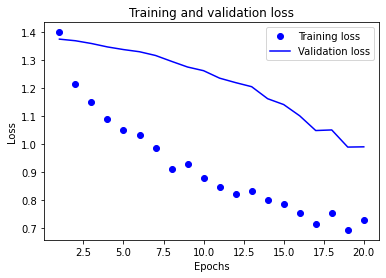

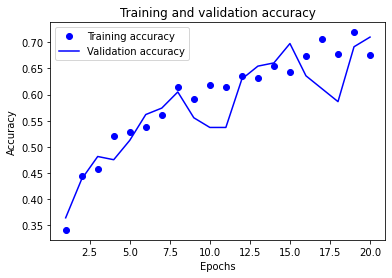

9/9 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7037
test_acc: 0.7037037014961243


In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

In [ ]:
import numpy as np
from keras.utils import to_categorical
from keras.layers import Conv1D, GRU, GlobalAveragePooling1D, Activation, Flatten, Dropout, Dense, MaxPool1D
from keras.models import Sequential
import scipy.io
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, train_test_split

In [ ]:
# Using functional API for multi modal input 
# eeg data
# df_all.shape (33480, 64)
# eye data
# file_eye_data.shape (33480, 64)

min_max_scaler = preprocessing.MinMaxScaler()
eeg_data_all = min_max_scaler.fit_transform(dir_data)
eye_data_all = min_max_scaler.fit_transform(file_eye_data)

eeg_data_reshaped =eeg_data_all.reshape(1080,6,3,64)

eye_data_reshaped =eye_data_all.reshape(1080,31,64)

index=np.ones(1080)
for i in range(1080):
    index[i]=i
np.random.shuffle(index)
index=index.astype('int64')
index_train=index[0:810]
index_test=index[810:]

eeg_x_total = eeg_data_reshaped[index_train]
y_total = np.array(flat_list)[index_train]
eeg_x_test = eeg_data_reshaped[index_test]
y_test = np.array(flat_list)[index_test]
eeg_x_train, eeg_x_valid, y_train, y_valid = train_test_split(eeg_x_total, y_total, test_size = 0.2, random_state = 1)

eye_x_total = eye_data_reshaped[index_train]

eye_x_test = eye_data_reshaped[index_test]

eye_x_train, eye_x_valid = train_test_split(eye_x_total, test_size = 0.2, random_state = 1)

y_train = to_categorical(y_train, num_classes = 4)
y_test = to_categorical(y_test, num_classes = 4)
y_valid = to_categorical(y_valid, num_classes = 4)




In [ ]:
eye_x_train .shape

(648, 31, 64)

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.2.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: wheel, numpy, opt-einsum, h5py, keras-preprocessing, google-pasta, absl-py, tensorboard, grpcio, wrapt, tensorflow-estimator, six, scipy, gast, protobuf, astunparse, termcolor
Required-by: fancyimpute


In [ ]:
#import tensorflow as tf
from keras.models import Model
from keras import layers
from keras import Input
from keras.utils import plot_model

In [ ]:
#from tensorflow.keras import layers
from keras.layers import Conv1D, Conv2D, GRU, GlobalAveragePooling1D, Activation, Flatten, Dropout, Dense, MaxPool1D, MaxPool2D, Concatenate
# import BatchNormalization
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras import backend

backend.clear_session()

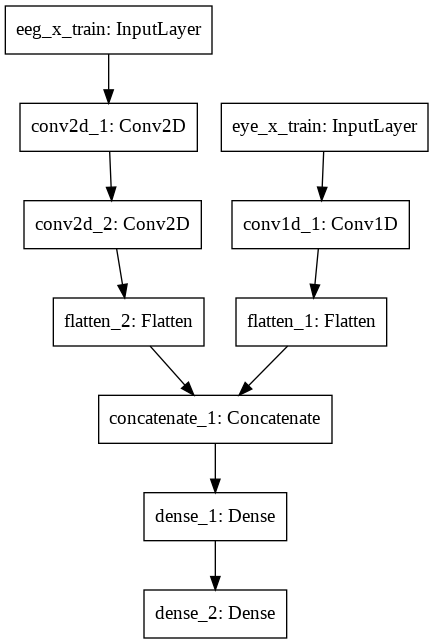

In [ ]:
backend.clear_session()
eye_inputs= Input(name='eye_x_train', shape=(31,64,))
eeg_inputs= Input(name='eeg_x_train', shape=(6,3,64,))

#eeg_inputs = Input(shape=(3,6,64)) #(eeg_x_train)
#eye_inputs= Input(shape=(31,64)) #(eye_x_train)


C1 = Conv1D(32, 3, activation='relu')(eye_inputs)
#M1= MaxPool1D(2)(C1)

#norm1 = BatchNormalization() (C1)
F1= Flatten()(C1)
#drop1=Dropout(0.4) (flat1)
#dense1=Dense(64, activation='relu')(drop)
#o1 = Dense(32, activation='softmax')(F1)
#x=Model(eye_inputs,o1)

C2 = Conv2D(64,(2,2), activation = 'relu')(eeg_inputs)
#M2= MaxPool2D((2,2))(C2)
#norm2=BatchNormalization()(C2)
C3 = Conv2D(32,(2,2), activation = 'relu')(C2)
F2=Flatten()(C3)
#drop2=Dropout(0.4) (flat2)
#o2=dense2=Dense(64, activation='relu')(F2)
#y=Model(eeg_inputs,o2)

# Concatentate
merge = Concatenate()([F1, F2])
#combined= Concatenate([x.output,y.output])

#flat=Flatten()(merge)
# Hidden connected layer and output
hidden = Dense(32, activation='relu')(merge)
#hidden2 = Dense(32, activation='relu')(hidden)
#drop = Dropout(0.4)(hidden)
out = Dense(4, activation='softmax')(hidden)

#model = Model([eye_inputs,eeg_inputs], out)

model=Model([eye_inputs,eeg_inputs],out)

from keras.optimizers import SGD, Adam
#opt = SGD(lr=0.0001)
opt= Adam(lr=0.0001)

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

# plot graph
plot_model(model)
#, show_shapes=True

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
eeg_x_train (InputLayer)        (None, 6, 3, 64)     0                                            
__________________________________________________________________________________________________
eye_x_train (InputLayer)        (None, 31, 64)       0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 5, 2, 64)     16448       eeg_x_train[0][0]                
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 29, 32)       6176        eye_x_train[0][0]                
____________________________________________________________________________________________

In [ ]:
eeg_x_train.shape

(648, 6, 3, 64)

In [ ]:
history = model.fit([eye_x_train,eeg_x_train], 
          y_train, 
          epochs = 50, 
          batch_size = 64,  
          validation_data=([eye_x_valid,eeg_x_valid], y_valid),
          verbose = 1 ,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

Train on 648 samples, validate on 162 samples
Epoch 1/50
648/648 [==============================] - 0s 444us/step - loss: 1.3623 - accuracy: 0.3194 - val_loss: nan - val_accuracy: 0.4198
Epoch 2/50
648/648 [==============================] - 0s 178us/step - loss: 1.2700 - accuracy: 0.4244 - val_loss: nan - val_accuracy: 0.4691
Epoch 3/50
648/648 [==============================] - 0s 190us/step - loss: 1.1708 - accuracy: 0.4892 - val_loss: nan - val_accuracy: 0.5185
Epoch 4/50
648/648 [==============================] - 0s 199us/step - loss: 1.0917 - accuracy: 0.5046 - val_loss: nan - val_accuracy: 0.4691
Epoch 5/50
648/648 [==============================] - 0s 183us/step - loss: 1.0131 - accuracy: 0.5710 - val_loss: nan - val_accuracy: 0.5864
Epoch 6/50
648/648 [==============================] - 0s 186us/step - loss: 0.9360 - accuracy: 0.6127 - val_loss: nan - val_accuracy: 0.5864
Epoch 7/50
648/648 [==============================] - 0s 192us/step - loss: 0.9284 - accuracy: 0.5988 - val_

In [ ]:
# tools for plotting confusion matrices
from matplotlib import pyplot as plt

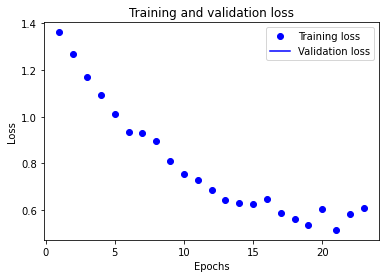

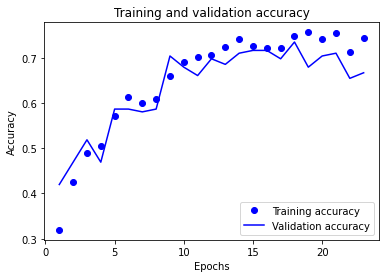

270/270 [==============================] - 0s 100us/step
test_acc: 0.7111111283302307


In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate([eye_x_test,eeg_x_test], y_test)
print('test_acc:', test_acc)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

y_predict= model.predict([eye_x_test,eeg_x_test])

In [ ]:
# Since the predicted values have probabilities we convert it to integers. Given lower value at 0.45
y_predict[y_predict > 0.45] = 1
y_predict[y_predict <= 0.45] = 0

In [ ]:
y_predict

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
# convert the encoded labels to the original labels
y_predict_2=np.argmax(y_predict, axis = 1)

In [ ]:
y_predict_2

array([3, 1, 2, 2, 2, 3, 2, 2, 0, 0, 1, 0, 2, 1, 0, 3, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 2, 0, 3, 2, 1, 3, 0, 3, 2, 3, 2, 1, 1, 1, 3, 1, 3, 0, 3,
       2, 0, 1, 0, 1, 3, 2, 1, 1, 2, 1, 2, 2, 1, 3, 1, 1, 0, 0, 2, 1, 1,
       0, 3, 3, 3, 3, 3, 3, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 3, 2, 2, 3, 0,
       0, 1, 2, 3, 3, 2, 3, 2, 0, 0, 2, 0, 1, 1, 3, 1, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 3, 3, 3, 0, 3, 3, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 3, 1,
       2, 3, 2, 2, 3, 1, 0, 0, 1, 0, 2, 2, 3, 3, 1, 2, 0, 1, 1, 0, 1, 0,
       2, 1, 1, 2, 0, 3, 3, 0, 1, 3, 3, 0, 0, 1, 0, 3, 3, 2, 1, 0, 3, 1,
       1, 2, 0, 3, 1, 2, 3, 0, 0, 3, 2, 0, 3, 0, 1, 1, 3, 3, 1, 2, 0, 1,
       1, 3, 2, 3, 2, 0, 3, 3, 1, 1, 3, 3, 2, 2, 2, 1, 2, 1, 2, 3, 0, 3,
       1, 3, 1, 1, 2, 1, 1, 0, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1,
       1, 1, 2, 2, 1, 3, 0, 1, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 2, 1])

In [ ]:
# convert the encoded labels to the original labels
y_test_2=np.argmax(y_test, axis = 1)

In [ ]:
y_test_2

array([2, 1, 2, 2, 2, 3, 1, 2, 0, 0, 1, 1, 0, 1, 2, 3, 0, 3, 3, 0, 0, 0,
       2, 0, 0, 2, 2, 3, 2, 2, 3, 0, 3, 2, 1, 0, 3, 1, 1, 3, 1, 3, 0, 3,
       2, 0, 1, 0, 1, 3, 1, 1, 1, 2, 1, 0, 2, 3, 3, 1, 1, 2, 0, 2, 3, 1,
       0, 3, 3, 3, 3, 0, 3, 3, 1, 1, 0, 2, 1, 0, 3, 2, 2, 3, 2, 2, 3, 0,
       2, 1, 0, 3, 3, 2, 3, 2, 0, 0, 2, 0, 3, 1, 1, 1, 1, 0, 0, 2, 3, 2,
       0, 0, 0, 2, 3, 3, 3, 0, 3, 3, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1,
       2, 0, 2, 2, 3, 1, 0, 3, 1, 0, 2, 2, 2, 1, 3, 0, 0, 3, 1, 0, 3, 2,
       2, 3, 1, 2, 2, 3, 3, 2, 1, 3, 0, 0, 3, 0, 0, 3, 3, 2, 1, 2, 3, 1,
       1, 2, 0, 3, 1, 0, 3, 0, 1, 3, 2, 0, 3, 2, 1, 1, 3, 0, 1, 2, 1, 1,
       1, 3, 2, 3, 2, 0, 3, 1, 0, 1, 3, 3, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0,
       1, 3, 1, 3, 1, 1, 3, 0, 3, 3, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1,
       1, 1, 1, 0, 1, 3, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 3, 1, 0, 2,
       3, 3, 0, 0, 2, 1])

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
multilabel_confusion_matrix(y_test_2, y_predict_2)

array([[[185,  20],
        [ 21,  44]],

       [[174,  25],
        [ 13,  58]],

       [[188,  16],
        [ 21,  45]],

       [[187,  15],
        [ 21,  47]]])

In [ ]:
# We will look at the model performance using the Confusion Matrix and Classification Report
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report')
print(classification_report(y_test_2, y_predict_2, target_names=["neutral","sad","fear","happy"]))

Classification Report
              precision    recall  f1-score   support

     neutral       0.69      0.68      0.68        65
         sad       0.70      0.82      0.75        71
        fear       0.74      0.68      0.71        66
       happy       0.76      0.69      0.72        68

    accuracy                           0.72       270
   macro avg       0.72      0.72      0.72       270
weighted avg       0.72      0.72      0.72       270



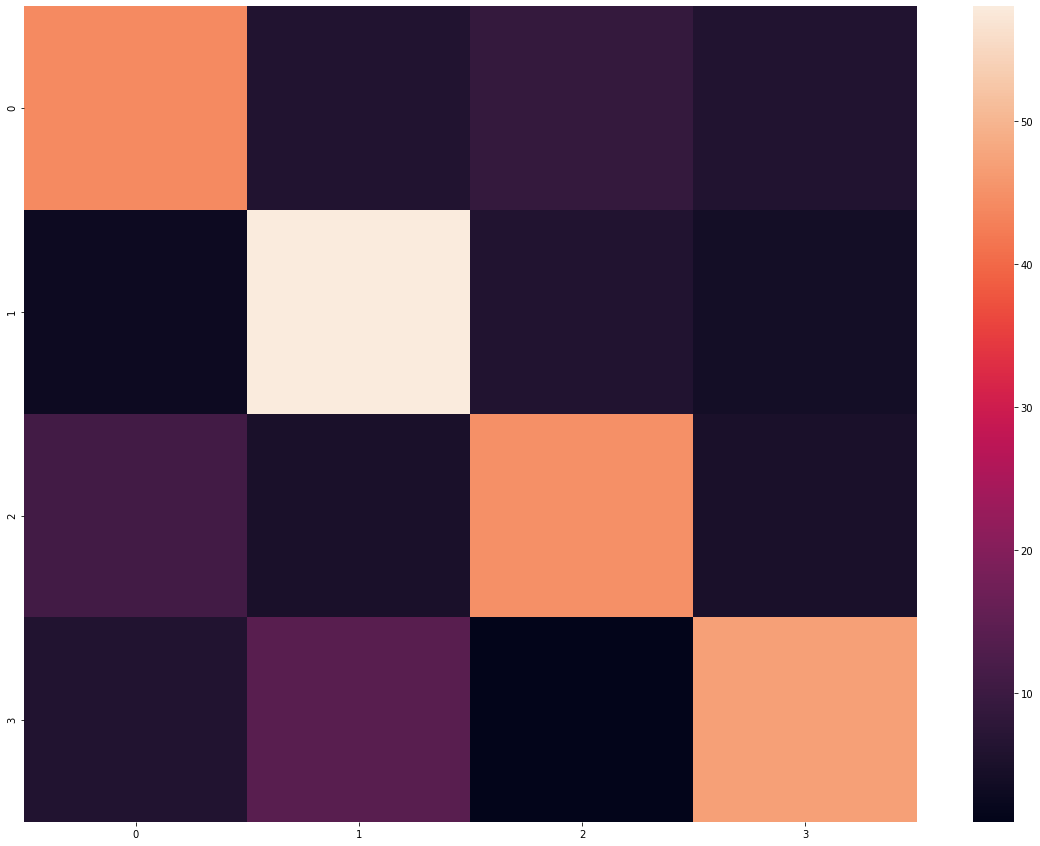

In [ ]:
# Use heatmap to color the results for the confusion matrix above
import seaborn as sns


plt.subplots(figsize=(20,15))
#sns.heatmap(confusion_matrix(test_generator.classes, y_pred))
sns.heatmap(confusion_matrix(y_test_2, y_predict_2))

References:
# https://github.com/Song-zhenzhen/EEG_emotion_classification_use_CNN-and-RNN/blob/master/CNN%2BRNN.py